In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')


In [102]:
df = pd.read_csv('survey.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [103]:
df.shape

(1259, 27)

In [104]:
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [106]:
df.columns = df.columns.str.lower()

In [107]:
round((df.isna().sum()/df.shape[0])*100,2)

timestamp                     0.00
age                           0.00
gender                        0.00
country                       0.00
state                        40.91
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     86.97
dtype: float64

In [108]:
df['country'].value_counts()


United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [109]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [110]:
df = df.drop(['country','state','timestamp','comments'], axis = 1)

In [111]:
round(df.describe(include='all'),2)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df['gender'].value_counts().reset_index()


,index,gender
0,Male,615
1,male,206
2,Female,121
3,M,116
4,female,62
5,F,38
6,m,34
7,f,15
8,Make,4
9,Male,3


In [113]:
df['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [114]:
df['gender'].value_counts()

Male      991
Female    247
Other      21
Name: gender, dtype: int64

In [115]:
df.loc[df.age<12,'age']=15
df.loc[df.age>75,'age']=75

<AxesSubplot:>

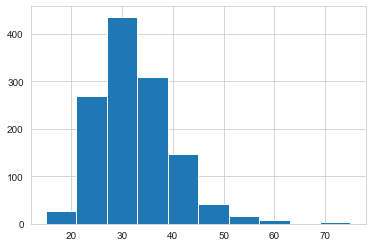

In [116]:
df['age'].hist()

<AxesSubplot:>

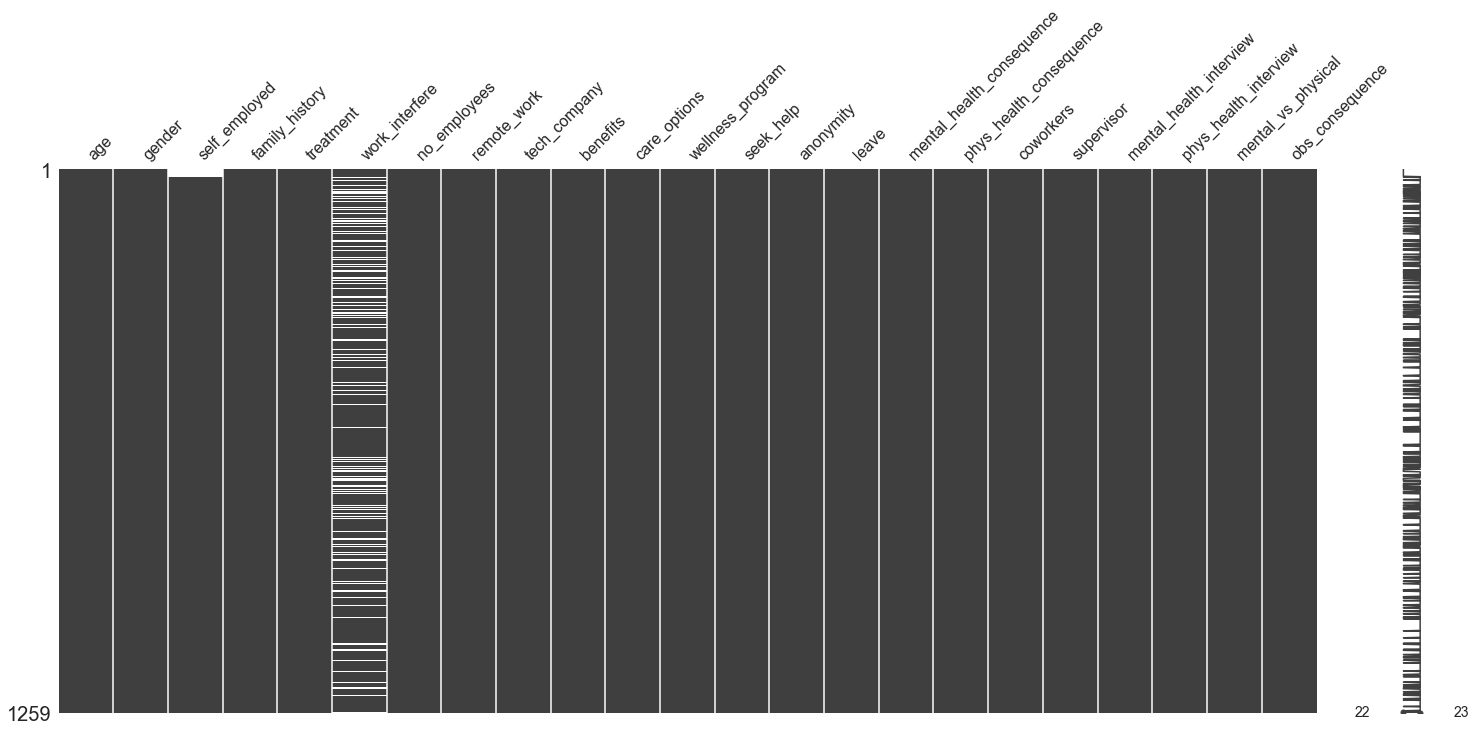

In [117]:
msno.matrix(df)


In [118]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.15,stratify=df['treatment'],random_state=51)

In [119]:
print(f'Train_data Dimensions : {train_data.shape}\n Test data dimension : {test_data.shape}')

Train_data Dimensions : (1070, 23)
 Test data dimension : (189, 23)


EDA

In [120]:
health = train_data.copy()

In [121]:
health.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [122]:
plt.figure(figsize=(8,8))
px.histogram(health, x = 'treatment',color='treatment')

<Figure size 576x576 with 0 Axes>

In [123]:
px.histogram(health, x = 'age' , color = 'treatment' )

In [124]:
px.histogram(health, x = 'self_employed',color='treatment',barmode='group')

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

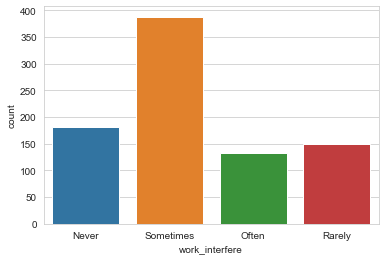

In [125]:
sns.countplot(data = health , x = 'work_interfere')


In [126]:
health['work_interfere'].value_counts(normalize = True)


Sometimes    0.455934
Never        0.213866
Rarely       0.175088
Often        0.155112
Name: work_interfere, dtype: float64

In [127]:
px.histogram(health, x = 'work_interfere',color='treatment',barmode='group')

In [128]:
px.histogram(health, x = 'family_history',color='treatment',barmode='group')

<AxesSubplot:xlabel='remote_work', ylabel='count'>

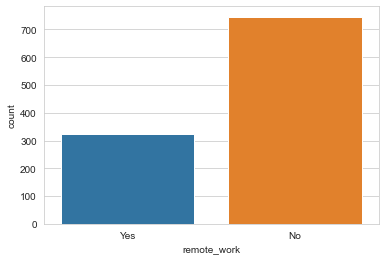

In [129]:
sns.countplot(data = health , x = 'remote_work')


In [130]:
px.histogram(health, x = 'remote_work',color='treatment',barmode='group')

<AxesSubplot:xlabel='benefits', ylabel='count'>

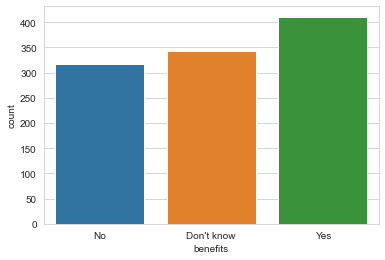

In [131]:
sns.countplot(data = health , x = 'benefits')

In [132]:
health['benefits'].value_counts(normalize = True)

Yes           0.384112
Don't know    0.319626
No            0.296262
Name: benefits, dtype: float64

In [133]:
px.histogram(health, x = 'benefits',color='treatment',barmode='group')

<AxesSubplot:xlabel='care_options', ylabel='count'>

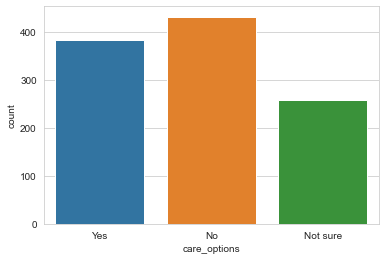

In [134]:
sns.countplot(data = health , x = 'care_options')

In [135]:
health['care_options'].value_counts(normalize=True)

No          0.402804
Yes         0.357009
Not sure    0.240187
Name: care_options, dtype: float64

In [136]:
px.histogram(health, x = 'care_options',color='treatment',barmode='group')

<AxesSubplot:xlabel='no_employees', ylabel='count'>

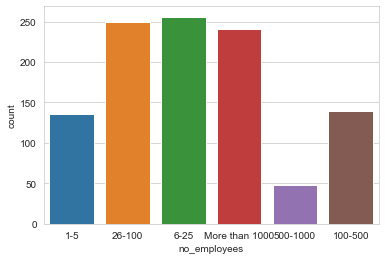

In [137]:
sns.countplot(data = health , x = 'no_employees')

In [138]:
px.histogram(health, x = 'no_employees',color='benefits',barmode='group')


In [139]:
px.histogram(health, x = 'no_employees',color='treatment',barmode='group')

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

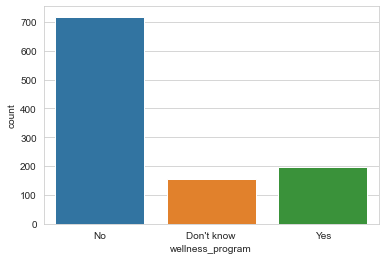

In [140]:
sns.countplot(data = health , x = 'wellness_program')


In [141]:
px.histogram(health, x = 'wellness_program',color='treatment',barmode='group')

<AxesSubplot:xlabel='seek_help', ylabel='count'>

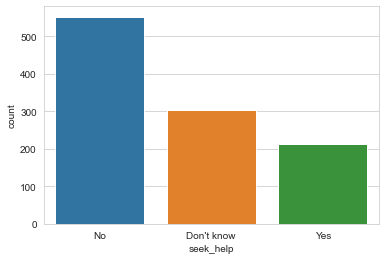

In [142]:
sns.countplot(data = health , x = 'seek_help')

In [143]:
px.histogram(health, x = 'seek_help',color='treatment',barmode='group')

<AxesSubplot:xlabel='anonymity', ylabel='count'>

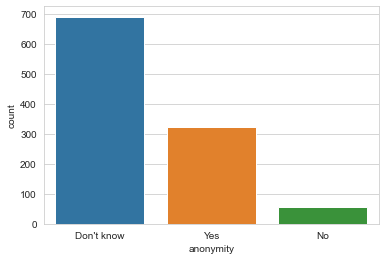

In [144]:
sns.countplot(data = health , x = 'anonymity')

In [145]:
px.histogram(health, x = 'anonymity',color='treatment',barmode='group')

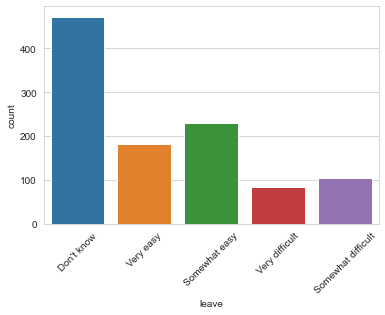

In [146]:
sns.countplot(data = health , x = 'leave')
plt.xticks(rotation=45)
plt.show()


In [147]:
px.histogram(health, x = 'leave',color='treatment',barmode='group')

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

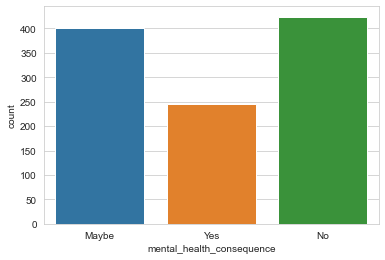

In [148]:
sns.countplot(data = health , x = 'mental_health_consequence' )

In [149]:
px.histogram(health, x = 'mental_health_consequence',color='treatment',barmode='group')

<AxesSubplot:xlabel='coworkers', ylabel='count'>

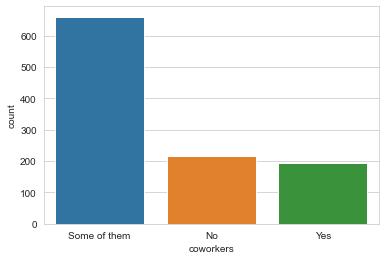

In [150]:
sns.countplot(data = health , x = 'coworkers' )


In [151]:
px.histogram(health, x = 'coworkers',color='treatment',barmode='group')

<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

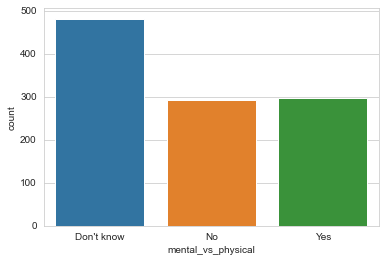

In [152]:
sns.countplot(data = health , x = 'mental_vs_physical' )


In [153]:
px.histogram(health, x = 'mental_vs_physical',color='treatment',barmode='group')

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

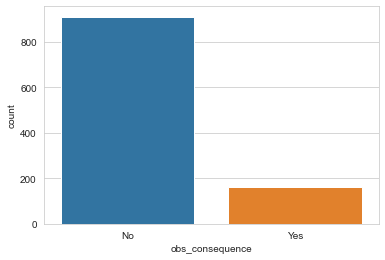

In [154]:
sns.countplot(data = health , x = 'obs_consequence')


In [155]:
px.histogram(health, x = 'obs_consequence',color='treatment',barmode='group')

In [156]:
#Self employed column contains as low as 2% null values , so it is okay to replace it with mode.
se_mode = train_data['self_employed'].mode().values[0] 
train_data['self_employed'].fillna(se_mode,inplace=True)
# Work_interfere contains almost 20% null values which is significant as we have less data.Let us once see the null values to find any pattern
train_data[train_data['work_interfere'].isna()]['treatment'].value_counts()

No     215
Yes      4
Name: treatment, dtype: int64

In [157]:
train_data['work_interfere'].fillna('Never',inplace = True)

<AxesSubplot:>

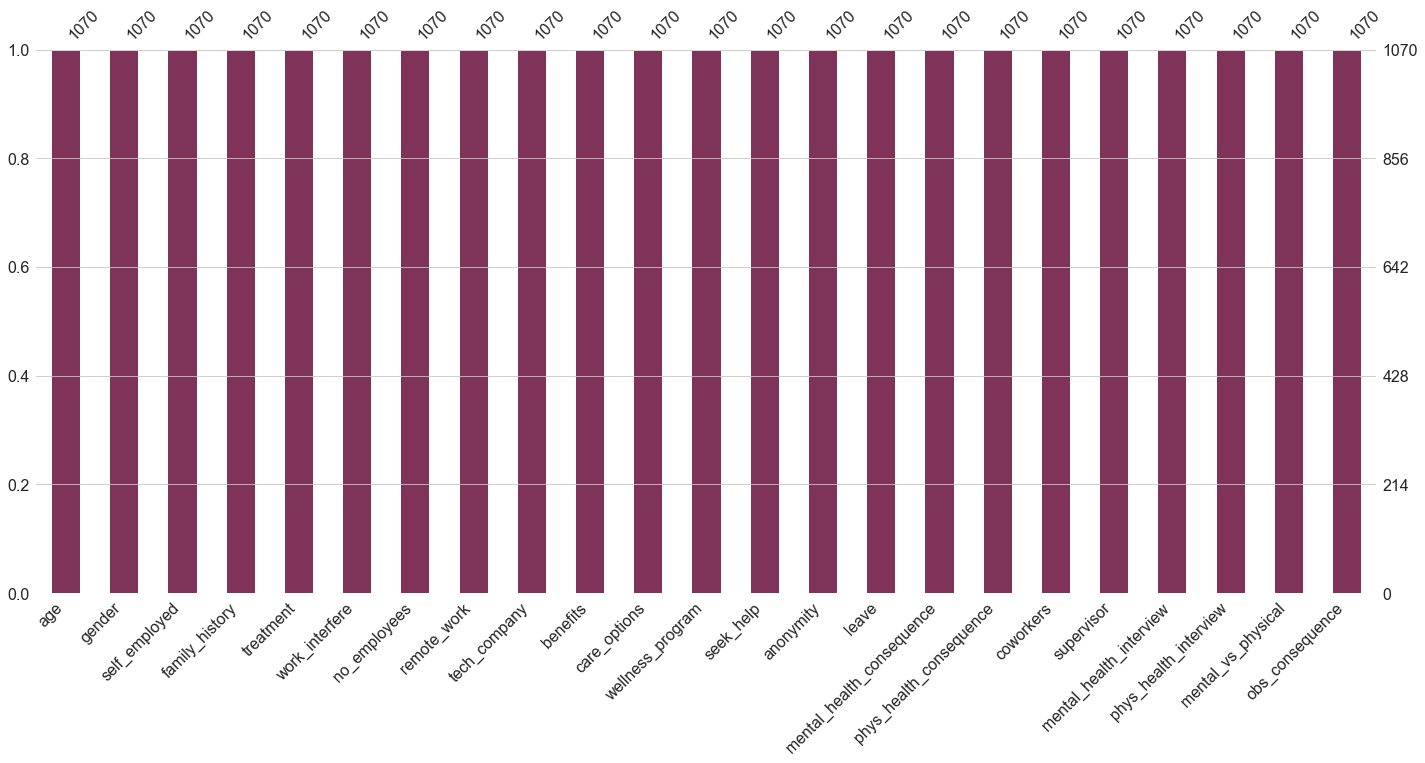

In [158]:
msno.bar(train_data,color = (0.5,0.2,0.35))

In [159]:
# Let us divide training set into independent and dependent variables
X_train = train_data.drop('treatment',axis=1)
y_train = train_data['treatment'].copy()

In [160]:
train_data.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [161]:
gender_cols = ['Female','Male','Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
work_interfere_cols = ['Never','Rarely','Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_col = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']

columns_for_encoder = [gender_cols,self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                            tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                            mental_health_consequence_cols,phys_health_consequence_cols,coworkers_col,supervisor_cols,mental_health_interview_cols,
                            phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols]


In [162]:
features = list(X_train.columns)

In [163]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
X_train[features[1:]] = ord_encoder.fit_transform(X_train.iloc[:,1:])

In [164]:
X_train.head()

,age,gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
328,30,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
16,23,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
910,48,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
184,43,1.0,0.0,1.0,3.0,5.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
937,33,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0


In [165]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
X_train[features] = scaler.fit_transform(X_train)


In [166]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)

Model

In [167]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline


In [168]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [169]:
def train_evaluate_rfe(model,X_train,y_train,name):
    rfe = RFECV(estimator=model)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    f1_train = f1_score(y_train, y_pred)

    #Cross validation
    f1_val = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)

    # returning the scores
    score = pd.DataFrame({'Name' : name , 'F1_score_validationset' : [f1_val.mean()]})
    return score

In [170]:
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)
    
    # returning the scores
    score = pd.DataFrame({'Name' : name ,'F1_score_validationset' : [f1_train]})
    return score

In [171]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
train_evaluate_rfe(log_reg,X_train,y_train,'Logistic Regression')

,Name,F1_score_trainset,F1_score_validationset
0,Logistic Regression,0.836138,0.82844


In [172]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4,random_state=51)
train_evaluate_rfe(dt_clf,X_train,y_train,'DecisionTreeClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,DecisionTreeClassifier,0.85124,0.851288


In [173]:
from sklearn.svm import SVC
svc_clf = SVC()
train_evaluate(svc_clf,X_train,y_train,'Support Vector Classifier')

,Name,F1_score_validationset
0,Support Vector Classifier,0.872471


In [174]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
train_evaluate_rfe(rnd_clf,X_train,y_train,'RandomForestClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,RandomForestClassifier,1.0,0.833127


In [175]:
from sklearn.ensemble import AdaBoostClassifier
dt_clf_ada = DecisionTreeClassifier()
Ada_clf = AdaBoostClassifier(base_estimator=dt_clf_ada,random_state=42)

train_evaluate(Ada_clf,X_train,y_train,"ADA BOOST CLASSIFIER")

,Name,F1_score_validationset
0,ADA BOOST CLASSIFIER,1.0


In [176]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier(random_state=42,subsample=0.8)

train_evaluate_rfe(gdb_clf,X_train,y_train,"GradientBoosting CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,GradientBoosting CLASSIFIER,0.85124,0.840505


In [177]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(verbosity=0)
train_evaluate_rfe(xgb_clf,X_train,y_train,"XG Boost CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,XG Boost CLASSIFIER,0.85124,0.844117


In [178]:
# from sklearn.preprocessing import PolynomialFeatures
# num_features = list()

# degress = [1, 2, 3, 4]
# print(degress)
# for d in degress:
#     # create transform
#     trans = PolynomialFeatures(degree=d)
#     # fit and transform
#     data = trans.fit_transform(X_train)
#     # record number of features
#     num_features.append(data.shape[1])
#     # summarize
#     print('Degree: %d, Features: %d' % (d, df.shape[1]))

In [179]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
        'kernel': ['linear', 'rbf','polynomial'],
        'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }
svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf , param_grid = param_distribs,
                              cv=5,scoring='f1',
                              verbose=1)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='f1', verbose=1)

In [88]:
grid_cv.best_estimator_

SVC(C=1, gamma=0.01)

In [89]:
train_evaluate(grid_cv.best_estimator_,X_train,y_train,"SVC Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,SVC Tuned,0.841089,0.835776


In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [91]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=30,
                       random_state=42)

In [92]:
train_evaluate(grid_search.best_estimator_,X_train,y_train,"RandomForest Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,RandomForest Tuned,0.854305,0.849826


In [93]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],
    'max_features':[2,4,6,8,10],
    'max_depth' : [1,2,3,4],
    'subsample': [0.25,0.5,0.75]}
]

gdb_clf2 = GradientBoostingClassifier(random_state=42)
grid_search2 = GridSearchCV(gdb_clf2, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'subsample': [0.25, 0.5, 0.75]}],
             return_train_score=True, scoring='f1')

In [94]:
grid_search2.best_estimator_

GradientBoostingClassifier(max_depth=1, max_features=8, random_state=42,
                           subsample=0.75)

In [95]:
train_evaluate(grid_search2.best_estimator_,X_train,y_train,"GradientBoosting Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,GradientBoosting Tuned,0.859309,0.854761


In [96]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],
    'eta' : [0.01,0.025, 0.05, 0.1],
    'max_features':[2,4,6,8],
    'max_depth' : [1,2,3,4],
    'subsample': [0.5,0.75],
    'booster':['gblinear','gbtree']}
]

xgb_clf = XGBClassifier(verbosity = 0)
grid_search3 = GridSearchCV(xgb_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [97]:
grid_search3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.05, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=2, max_features=2, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [98]:
train_evaluate(grid_search3.best_estimator_,X_train,y_train,"XGBoost Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,XGBoost Finetuned,0.861252,0.853731


In [99]:
XGBoost_final = grid_search3.best_estimator_

In [91]:
scores = pd.DataFrame({'Train_score' : [0.8489,0.8517,0.8566,0.8601],'Val_score' : [0.8428,0.8508,0.8527,0.8563]} 
                        ,index=['SVM','RandomForest','GDBoost','XGBoost'])
scores

,Train_score,Val_score
SVM,0.8489,0.8428
RandomForest,0.8517,0.8508
GDBoost,0.8566,0.8527
XGBoost,0.8601,0.8563


In [92]:
data = {'feature_names':features,'feature_importance': XGBoost_final.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


Text(0.5, 1.0, 'Key Features')

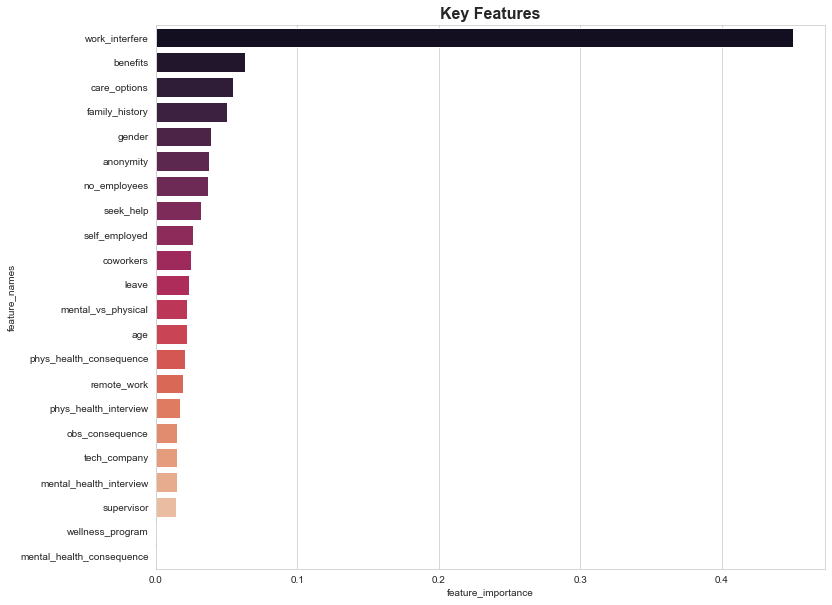

In [93]:
# I have found this method from stackoverflow for plotting feature importance easily
plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Key Features", fontsize=16, fontweight="bold")

In [181]:
#Outliers sensitive
#LASSO
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge 
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

from sklearn.model_selection import GridSearchCV
#LightGBM
params = {'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 
              'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
              'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
              'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 
              'min_split_gain': 0.5, 'min_child_weight': 1, 
              'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
              'metric': 'binary_error'}

# Create parameters to search
grid_params = {'learning_rate': [0.01], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]} #add scoring = 'f1'

    # Create classifier to use. Note that parameters have to be input manually
    # not as a dict!
mod = lgb.LGBMClassifier(**params)

    # To view the default model params:
mod.get_params().keys()

    # Create the grid
grid_search4 = GridSearchCV(mod, param_grid=grid_params, verbose=1, cv=5, n_jobs=-1)
grid_search4.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   27.9s finished


GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                      max_bin=512, metric='binary_error',
                                      min_child_samples=5, min_child_weight=1,
                                      min_split_gain=0.5, num_class=1,
                                      num_leaves=64, objective='binary',
                                      reg_alpha=5, reg_lambda=10,
                                      scale_pos_weight=1, subsample=1,
                                      subsample_for_bin=200, subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.75, 0.8],
                         'learning_rate': [0.01], 'n_estimators': [8, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'reg_alpha': [1, 2, 6], 'reg_lambda': [1, 2, 6],
                  

In [122]:
train_evaluate(grid_search4.best_estimator_,X_train,y_train,"LGM Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,LGM Finetuned,0.860781,0.851842


In [101]:
#Cross validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [182]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(random_state=42)
train_evaluate_rfe(ext_clf,X_train,y_train,'ExtraTreesClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,ExtraTreesClassifier,0.85124,0.851288


In [124]:
train_evaluate(ext_clf, X_train, y_train, 'ExtraTreesClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,ExtraTreesClassifier,1.0,0.823966


In [131]:
grid_search5 = GridSearchCV(
    estimator=ext_clf,
    param_grid={
        'n_estimators': [10,50,100],
        'max_depth': [2,8,16,32,50],
        },
    scoring='f1',
    cv=5
)

grid_search5.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [2, 8, 16, 32, 50],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')

In [132]:
train_evaluate(grid_search5.best_estimator_,X_train,y_train,"ExtraTrees Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,ExtraTrees Finetuned,0.844873,0.844473


In [133]:
train_evaluate_rfe(grid_search5.best_estimator_,X_train,y_train,"ExtraTrees Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,ExtraTrees Finetuned,0.853971,0.849719


In [183]:
classifiers = [('rnd', rnd_clf),
               ('ext', ext_clf),                             
               ('lgm', mod)]

In [184]:
from sklearn.ensemble import StackingClassifier

sclf = StackingClassifier(estimators=classifiers, 
                          final_estimator=xgb_clf, stack_method='auto',
                         n_jobs=-1,
                         passthrough=False)

In [185]:
train_evaluate_rfe(sclf, X_train, y_train, 'StackedClassifier')

,Name,F1_score_validationset
0,StackedClassifier,0.971586


In [92]:
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)
    
    # returning the scores
    score = pd.DataFrame({'Name' : name ,'F1_score_trainset' : [f1_train], 'F1_score_validationset' : [f1_val.mean()]})
    return score